In [ ]:
#Paul Scala
#Z23561522
#Assignment #3
#Problem #2
# Google Colab link 

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
class NeuralNetwork():
    def __init__(self):
        self.learning_rate = 1
        # initialize weight vector with random values
        self.weights = np.random.randn(3,1)

    def hard_limiter(self, x):
        # apply hard-limiter activation function to input
        return np.where(x >= 0, 1, 0)

    def forward_propagation(self, inputs):
        # multiply inputs by weights and pass through activation function
        summation = np.dot(inputs, self.weights)
        activation = self.hard_limiter(summation)
        return activation

    def train(self, inputs, labels, num_train_iterations=10):
        # perform perceptron learning for a given number of iterations
        for epoch in range(num_train_iterations):
            # loop over all training samples
            for i in range(len(inputs)):
                # perform forward propagation on current input
                x = inputs[i].reshape(1,-1) # convert to column vector
                y = labels[i]
                prediction = self.forward_propagation(x)
                # calculate error and update weights
                error = y - prediction
                self.weights = self.weights + self.learning_rate * x * error

    def pred(self, inputs):
        # classify inputs using trained weights
        summation = np.dot(inputs, self.weights)
        prediction = self.hard_limiter(summation)
        return prediction

In [68]:
# create input and label arrays for training
inputs = np.array([[1,1], [1,2], [2,1], [2,2], [3,3]])
labels = np.array([0, 0, 0, 1, 1]).reshape(-1,1)

In [69]:
# add bias to inputs
inputs_bias = np.insert(inputs, 0, 1, axis=1)


In [70]:
# create network and train it
net = NeuralNetwork()
net.train(inputs_bias, labels, 100)


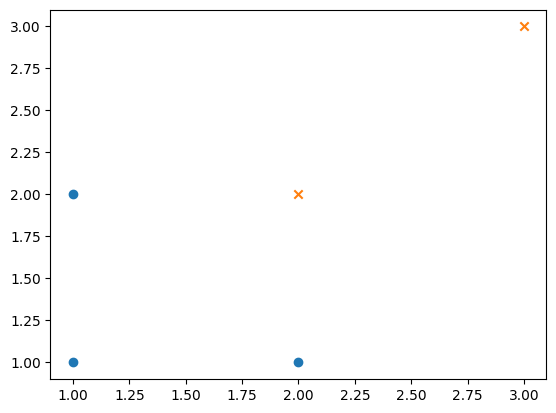

In [71]:
# plot data points with different markers for each group
# plot data points with different markers for each group
class_0_mask = (labels == 0).reshape(-1)
class_1_mask = (labels == 1).reshape(-1)
plt.scatter(inputs[class_0_mask,0], inputs[class_0_mask,1], marker='o', label='Class 0')
plt.scatter(inputs[class_1_mask,0], inputs[class_1_mask,1], marker='x', label='Class 1')


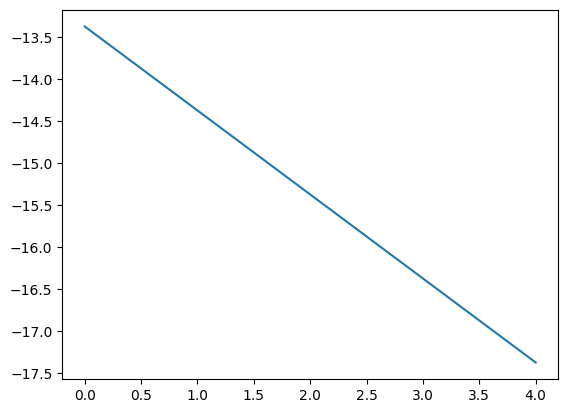

In [72]:
# plot decision boundary
x1 = np.linspace(0, 4, 100)
weights = net.weights.ravel()  # flatten weights to (3,)
x2 = (-weights[0]/weights[2]) - (weights[1]/weights[2])*x1
plt.plot(x1, x2, label='Decision boundary')


In [73]:
# classify test data using trained network
test_inputs = np.array([[2,2], [2,1], [0,0], [0,2], [1,0]])
test_inputs_bias = np.insert(test_inputs, 0, 1, axis=1)
predictions = net.pred(test_inputs_bias)
print("input\tx1\tx2\tdesired label\tpredicted label")
for i in range(len(test_inputs)):
    print("{}\t{}\t{}\t{}\t{}".format(test_inputs[i], test_inputs[i][0], test_inputs[i][1], labels[i][0], predictions[i][0]))

input	x1	x2	desired label	predicted label
[2 2]	2	2	0	1
[2 1]	2	1	0	1
[0 0]	0	0	0	0
[0 2]	0	2	1	0
[1 0]	1	0	1	1
